# Necessary Packages

In [155]:
import pandas as pd                 #package for data analysis
import numpy as np                  #package for handling data arrays
import matplotlib.pyplot as plt     #package for data visualization
import spacy                        #package for text analysis
import neattext as nt               #package for text cleaning
nlp=spacy.load('en_core_web_lg')   #loading spacy large language model
from collections import Counter    #package for counting wordss
import nltk                        #package for text analysis
from nltk.stem import 	WordNetLemmatizer  #packahe for lemmatization
wordnet_lemmatizer = WordNetLemmatizer()   #creating object of word lemmatizer

# Reading the Data

In [156]:
df=pd.read_json('Magazine_Subscriptions.json',lines=True)

# View of the Data

In [168]:
df

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,5,9,False,"11 8, 2001",AH2IFH762VY5U,B00005N7P0,ted sedlmayr,"for computer enthusiast, MaxPC is a welcome si...","AVID READER SINCE ""boot"" WAS THE NAME",1005177600,NaN,NaN
1,5,9,False,"10 31, 2001",AOSFI0JEYU4XM,B00005N7P0,Amazon Customer,Thank god this is not a Ziff Davis publication...,The straight scoop,1004486400,NaN,NaN
2,3,14,False,"03 24, 2007",A3JPFWKS83R49V,B00005N7OJ,Bryan Carey,Antiques Magazine is a publication made for an...,"Antiques Magazine is Good, but not for Everyone",1174694400,{'Format:': ' Print Magazine'},NaN
3,5,13,False,"11 10, 2006",A19FKU6JZQ2ECJ,B00005N7OJ,Patricia L. Porada,This beautiful magazine is in itself a work of...,THE DISCERNING READER,1163116800,{'Format:': ' Print Magazine'},NaN
4,5,NaN,True,"07 14, 2014",A25MDGOMZ2GALN,B00005N7P0,Alvey,A great read every issue.,Five Stars,1405296000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
89684,5,NaN,True,"08 16, 2016",AB5HCI50SF1TK,B01HI8V1C2,Katie Reid,This was a nice surprise for my boyfriend. He ...,Quick Delivery,1471305600,NaN,NaN
89685,1,NaN,True,"08 10, 2016",A2X11NZMPI7M0T,B01HI8V1C2,John,Magazine looks like it is printed on recycled ...,One Star,1470787200,NaN,NaN
89686,5,NaN,True,"07 31, 2016",A3EGFFBRQVO7L7,B01HI8V1C2,Jeff Johnson,cant go wrong with an SI subscription\nvery pl...,great magazine,1469923200,NaN,NaN
89687,5,NaN,True,"10 5, 2017",A3H23AVKFN62ZT,B01HIZSSQM,David Lashaway,This magazine is by far my all time favorite o...,Favorite metal detecting magazine,1507161600,NaN,NaN


# Creating Corpus from reviewText

In [157]:
rew_text=list()

In [158]:
def get_review_text(review_text):
    for word in review_text.split():
        #print(word)
        rew_text.append(word)

In [159]:
df['reviewText'].apply(lambda x:get_review_text(str(x)))

0        None
1        None
2        None
3        None
4        None
         ... 
89684    None
89685    None
89686    None
89687    None
89688    None
Name: reviewText, Length: 89689, dtype: object

In [160]:
len(rew_text) #number of words

3868935

In [169]:
review_text=' '.join(rew_text[0:80000])  #selecting 80k reviews

# Preprocessing

In [170]:
cleaned_text=[]

In [171]:
def preprocessing(text):
    text=nt.remove_special_characters(text)     #removind spacial characters
    text=nt.remove_stopwords(text)              #removing stopwords
    text=nt.remove_numbers(text)                #removing numbers
    text=nt.remove_punctuations(text)           #removing punctuations
    text=nt.remove_shortwords(text,3)           #removing short words of lenght 3
    tokenization = nltk.word_tokenize(text)
    for word in tokenization:
        cleaned_text.append(wordnet_lemmatizer.lemmatize(word))
    return ' '.join(cleaned_text)

In [172]:
cleaned_text=preprocessing(review_text)

# POS Tagging

In [173]:
def pos_tagging(text):
    doc = nlp(text)
    pos_counts = doc.count_by(spacy.attrs.POS)
    pos = [doc.vocab[pos].text for pos in pos_counts.keys()]
    pos_counts = [pos_counts[pos] for pos in pos_counts.keys()]
    plt.figure(figsize=(20,10))
    plt.bar(pos, pos_counts,color='purple')
    plt.title('POS Counts')
    plt.show()


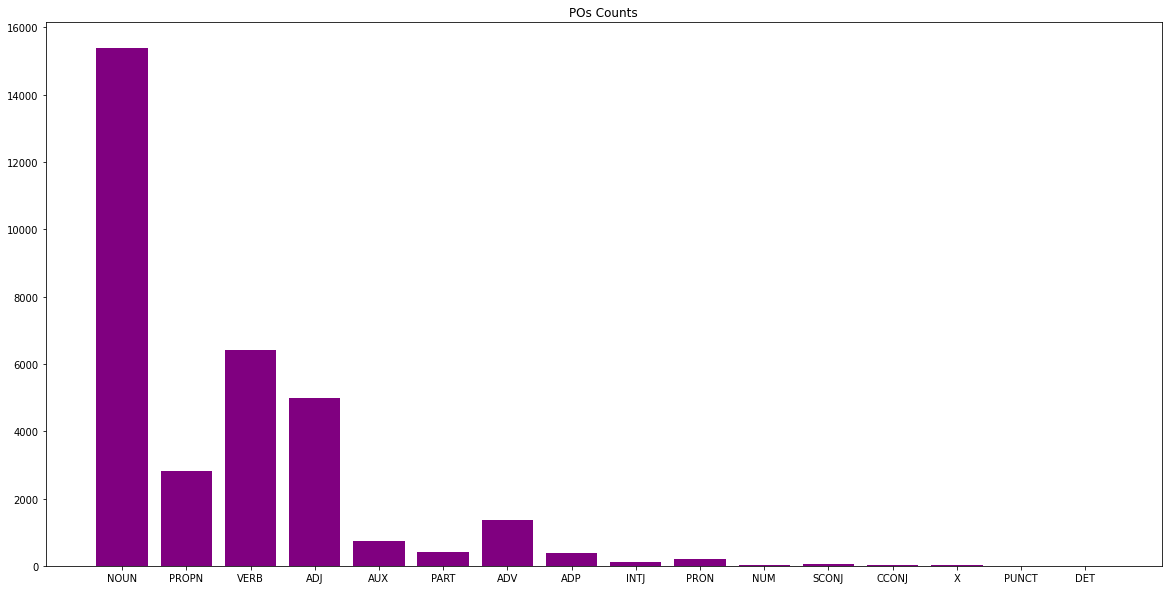

In [174]:
pos_tagging(cleaned_text)

# Uni-grams

In [175]:
uni_grams=(pd.Series(nltk.ngrams(cleaned_text.split(), 1)).value_counts())[:10]

<AxesSubplot:title={'center':'Unigrams Counts'}>

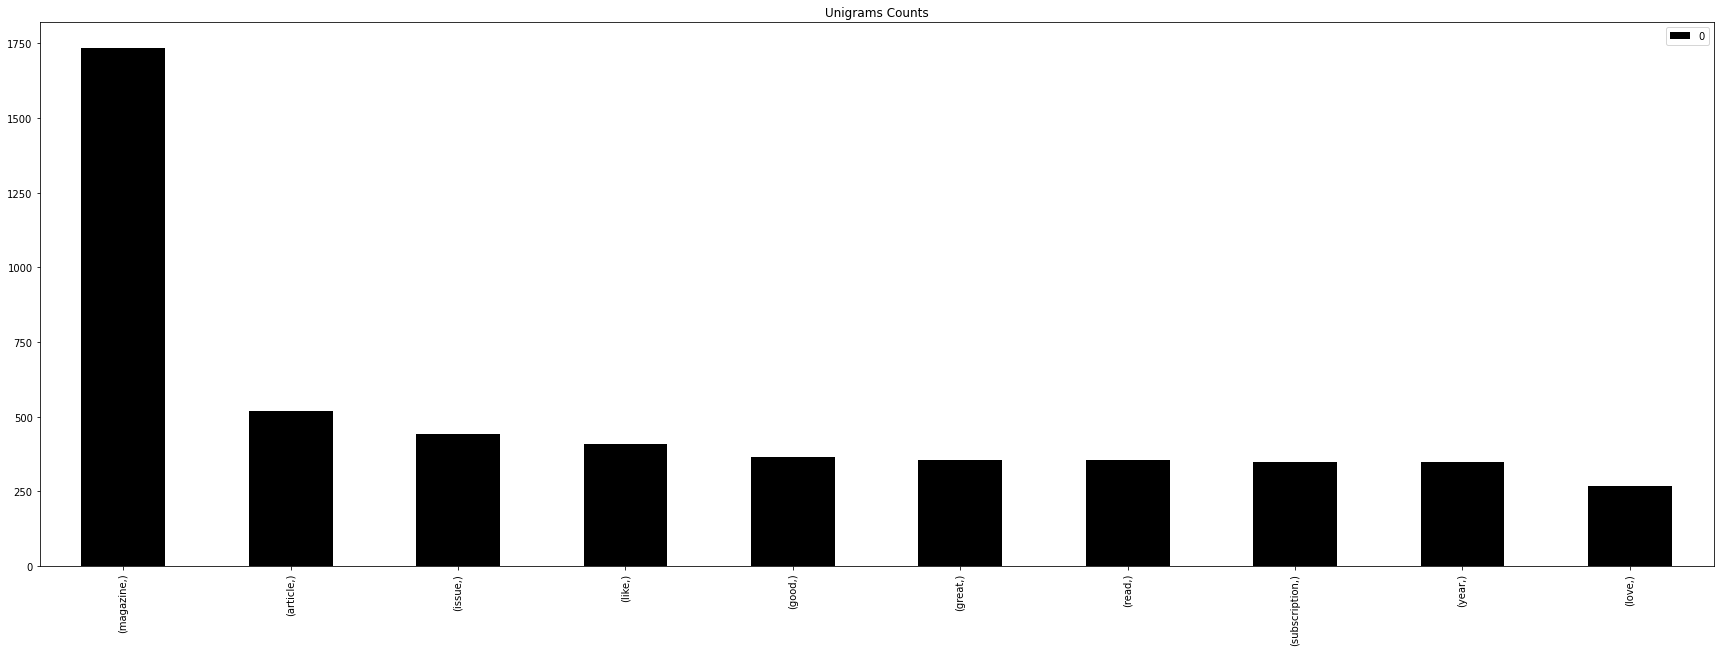

In [181]:
pd.DataFrame(uni_grams).plot(kind='bar',figsize = (30, 10),color='black',title='Unigrams Counts')

# Bi-grams

<AxesSubplot:title={'center':'Bigrams Counts'}>

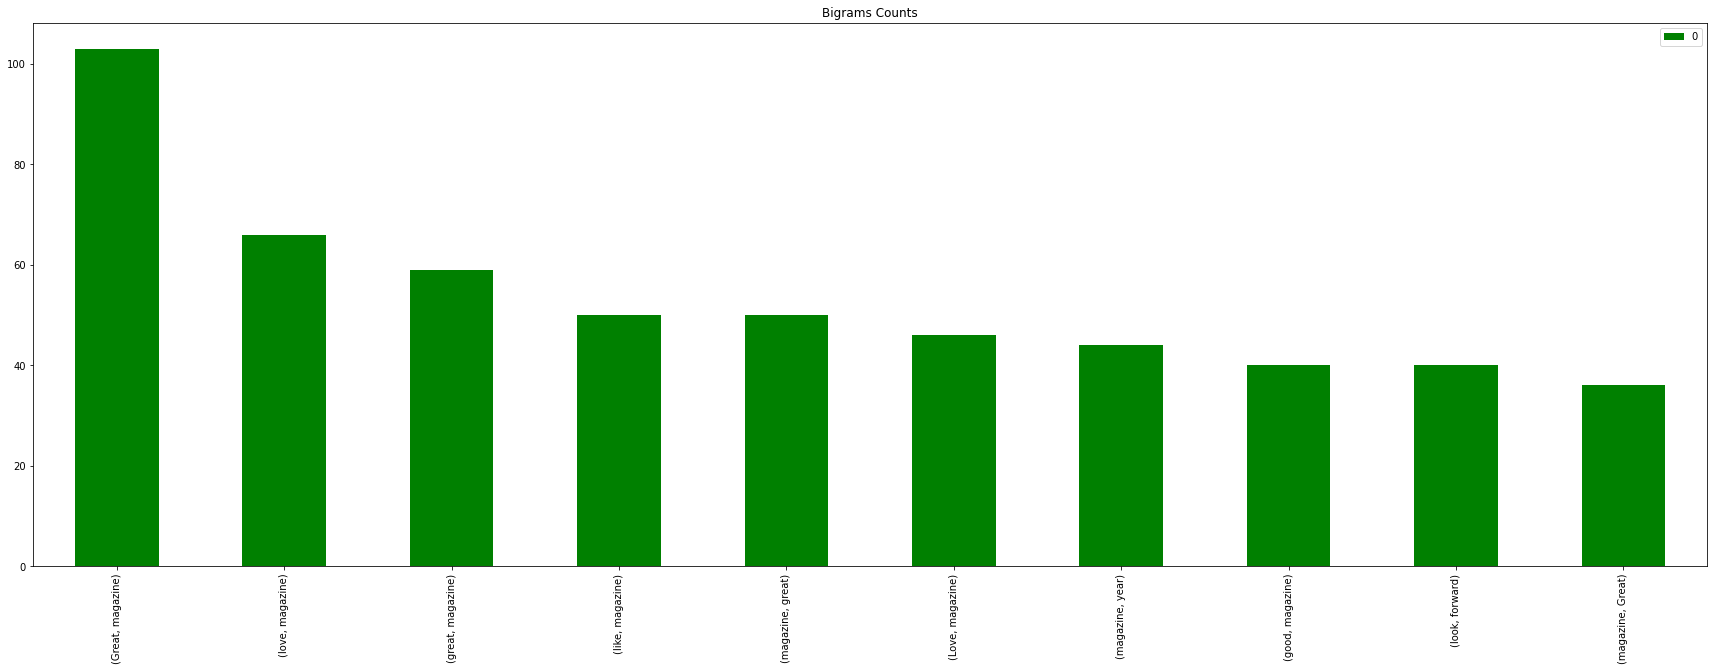

In [183]:
bi_grams=(pd.Series(nltk.ngrams(cleaned_text.split(), 2)).value_counts())[:10]
pd.DataFrame(bi_grams).plot(kind='bar',figsize = (30, 10),color='green',title='Bigrams Counts')

# Tri-grams

<AxesSubplot:title={'center':'Trigrams Counts'}>

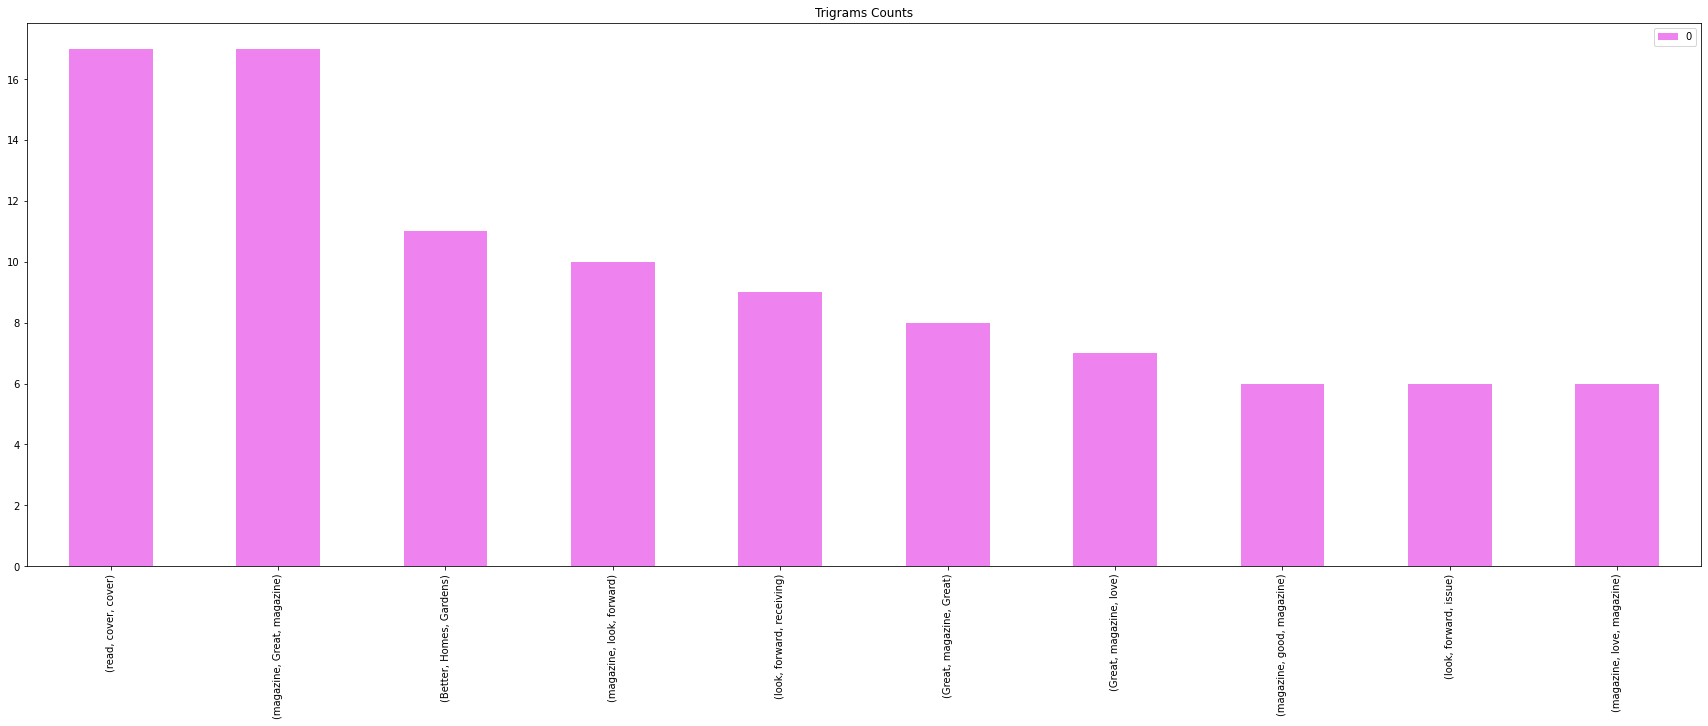

In [184]:
tri_grams=(pd.Series(nltk.ngrams(cleaned_text.split(), 3)).value_counts())[:10]
pd.DataFrame(tri_grams).plot(kind='bar',figsize = (30, 10),color='violet',title='Trigrams Counts')

# Word Frequencies

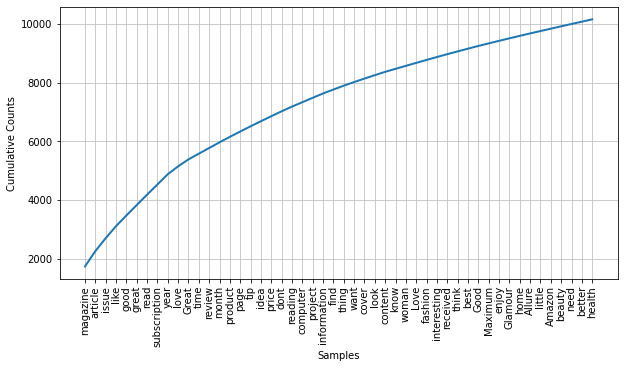

In [179]:
import nltk
from nltk import FreqDist
# tokenize the text into individual words
words = nltk.word_tokenize(cleaned_text)

# compute the frequency distribution of words
freq_dist = FreqDist(words)

# plot the cumulative frequency distribution of the top 50 words
n = 50  # set the number of top words to show
top_n_words = freq_dist.most_common(n)
plt.figure(figsize=(10, 5))
freq_dist.plot(n, cumulative=True)
plt.show()


# Word Cloud

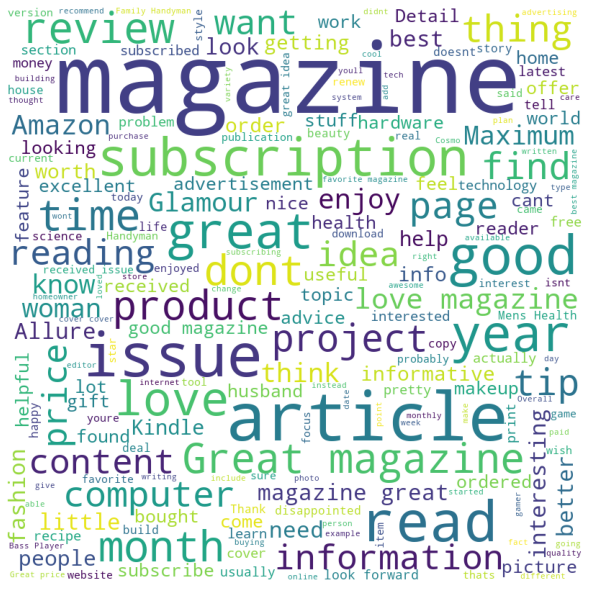

In [180]:
import wordcloud
from wordcloud import WordCloud

# generate the word cloud
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white', 
                      min_font_size = 10).generate(cleaned_text)

# plot the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# show the plot
plt.show()
